# Regresión lineal simple

La relación entre la variable independiente x y la viariable dependiente y es representada en la siguiente ecuación:

y = mX + c 

## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



## Importar dataset 

In [2]:
salary_df = pd.read_csv('../datos/Salary_Data.csv')


## Análisis preliminar

In [3]:
#Tamaño del set de datos- Filas y columnas
salary_df.shape

(30, 2)

In [4]:
#Resumen estadístico de las variables numéricas
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


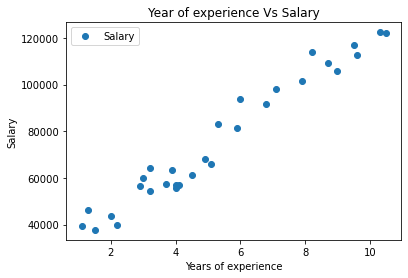

In [5]:
#Análisis visual
#Grafico de dispersión de las dos variables
salary_df.plot(x = 'YearsExperience', y ='Salary', style = 'o')
plt.title('Year of experience Vs Salary')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

c:\Users\jmald\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

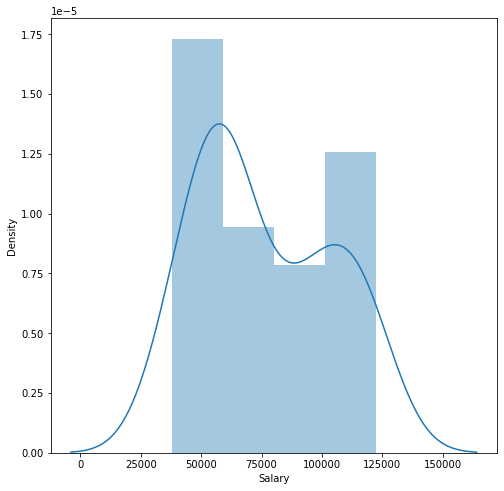

In [6]:
#Histograma de la variable a predecir
plt.figure(figsize = (8,8))
plt.tight_layout()
sns.distplot(salary_df['Salary'])

## Dividir en variables independientes y dependientes

In [7]:
# Variables independientes
X = salary_df.iloc[:, :-1].values
# Variable dependiente
y = salary_df.iloc[:, 1].values


## Modelado

In [8]:
# Dividir el set de datos en entrenamiento y testeo
"""Es más correcto utilizar k-folds"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
# Entrenar el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predecir los valores de la variable independiente
y_pred = regressor.predict(X_test)

In [11]:
#Para saber cual es la formula que define nuestra linea
print(regressor.intercept_)
print(regressor.coef_)

26780.099150628186
[9312.57512673]


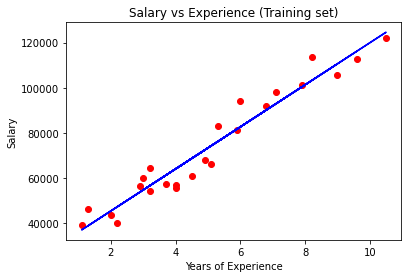

In [12]:
# Visualización del modelo comparado con los valores de entrenamiento
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

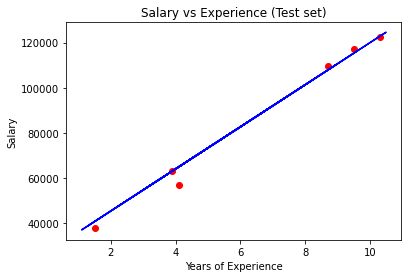

In [13]:
# Visualizar el modelo comparado con los valores de testeo
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
#Comparación de los valores predichos con los reales 
salario_real_vs_pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
salario_real_vs_pred_df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


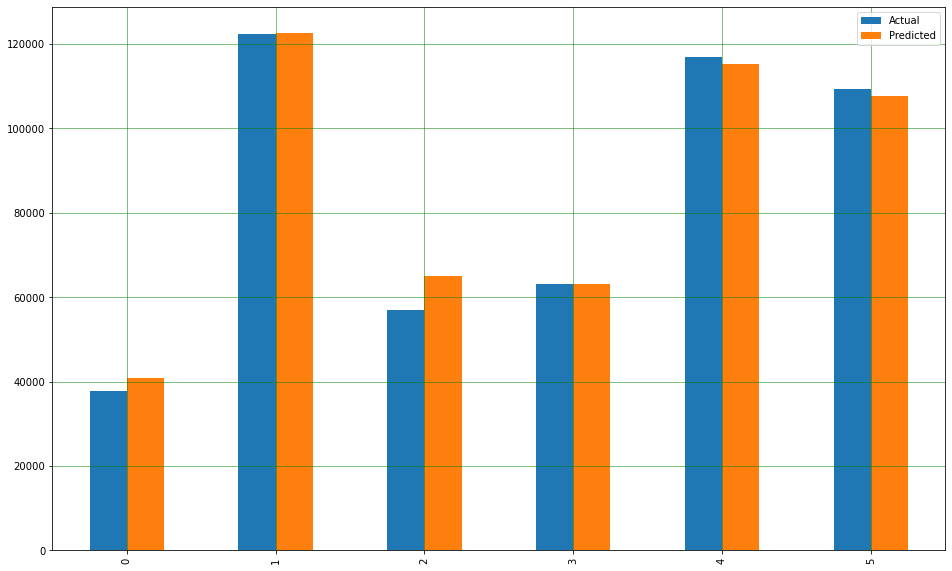

In [15]:
#Comparación con gráfico de barras
salario_real_vs_pred_df = salario_real_vs_pred_df.head(10)
salario_real_vs_pred_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Medidas de error

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345


## Regresion lineal multiple

In [17]:
# Importar el set de datos
dataset = pd.read_csv('../datos/50_Startups.csv')
#Variables dependientes
X = dataset.iloc[:, :-1].values
#Variable independiente 
y = dataset.iloc[:, 4].values
dataset.head()

"""
Otra forma de seleccionar columnas
x = df.iloc[:, df.columns != 'columnatarget']
y = df.iloc[:, df.columns == 'columnatarget']
"""


"\nOtra forma de seleccionar columnas\nx = df.iloc[:, df.columns != 'columnatarget']\ny = df.iloc[:, df.columns == 'columnatarget']\n"

In [18]:
# Codificación de la variable categorica
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder()
a = onehotencoder.fit_transform(X[:,[3]]).toarray()
a

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [19]:
#Eliminación de la columna reiterativa al hacer one hot encoder
a=a[:,1:]
a


array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.]])

In [20]:
#Añadir las variables equivalentes a la categorica a las variables predictoras
X = X[:,:3]
X=np.concatenate((X, a),axis=1)

In [21]:
# Dividir en entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#Entrenar al modelo
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
#Predecir valores
y_pred=regressor.predict(X_test)

In [22]:
import statsmodels.api as sm1
""" No recuerdo porqué había que hacer esto"""
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)
X_opt=np.array(X[:,[0,1,2,3,4,5]],dtype = float)
#Entrenamos el modelo
regressor_OLS=sm1.OLS(endog=y,exog=X_opt).fit()
#Resumen de los resultados
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        18:39:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#forward selection
X_opt2=np.array(X[:,[0]],dtype = float)
regressor_OLS2=sm1.OLS(endog=y,exog=X_opt2).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                nan
Time:                        18:39:09   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   5700.155     19.651      0.000    1.01e+05    1.23e+05
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Decision tree regressor

In [24]:
#Importar el set de datos
day_df = pd.read_csv('../datos/day.csv', usecols=['season','holiday','weekday','workingday','cnt'])
day_df.head()

,season,holiday,weekday,workingday,cnt
0,1,0,6,0,985
1,1,0,0,0,801
2,1,0,1,1,1349
3,1,0,2,1,1562
4,1,0,3,1,1600


In [27]:
#Dividir en variables dependientes e independientes
y_day = day_df.iloc[: ,-1:]
x_day = day_df.iloc[: ,:-1]


In [29]:
#Dividir en entrenamiento y testeo
from sklearn.model_selection import train_test_split
x_day_train, x_day_test, y_day_train, y_day_test = train_test_split(x_day, y_day, test_size=0.2, random_state = 0 )

In [30]:
#Cargar modelo
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mse', min_samples_leaf=5)

In [31]:
#Entrenar modelo
dtr.fit(x_day_train, y_day_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [33]:
#Predecir valores
model_pred = dtr.predict(x_day_test)
model_pred

array([5440.05882353, 5870.11111111, 2529.64705882, 3248.23529412,
       2629.35294118, 4319.83333333, 5275.35714286, 4301.5       ,
       4613.52631579, 2985.28571429, 2629.35294118, 3248.23529412,
       2985.28571429, 4815.        , 6359.125     , 4405.375     ,
       5437.5       , 5030.95      , 2574.35      , 4405.375     ,
       5870.11111111, 2529.64705882, 4301.5       , 4951.05555556,
       2596.52631579, 5529.76190476, 6115.11111111, 6359.125     ,
       4589.57142857, 4613.52631579, 2596.52631579, 5870.11111111,
       4794.75      , 5440.05882353, 2985.28571429, 2529.64705882,
       5870.11111111, 5440.05882353, 2629.35294118, 4794.75      ,
       4613.52631579, 2596.52631579, 5275.35714286, 2985.28571429,
       6359.125     , 4301.5       , 2310.27272727, 5529.76190476,
       2529.64705882, 4951.05555556, 4951.05555556, 5437.5       ,
       4405.375     , 4626.52380952, 5870.11111111, 4589.57142857,
       4319.83333333, 4319.83333333, 5437.5       , 2629.35294

In [34]:
# Analizar el modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_day_test, model_pred)
mae = mean_absolute_error(y_day_test, model_pred)
rmse =np.sqrt(mean_squared_error(y_day_test, model_pred))
r_square = r2_score(y_day_test, model_pred)
print(f'mean square error:{mse}\nmean absolute error:{mae}\nroot mean square error:{rmse}\nr_square: {r_square}')

mean square error:3009203.23120855
mean absolute error:1444.530967246548
root mean square error:1734.7055171436302
r_square: 0.27086927690767404


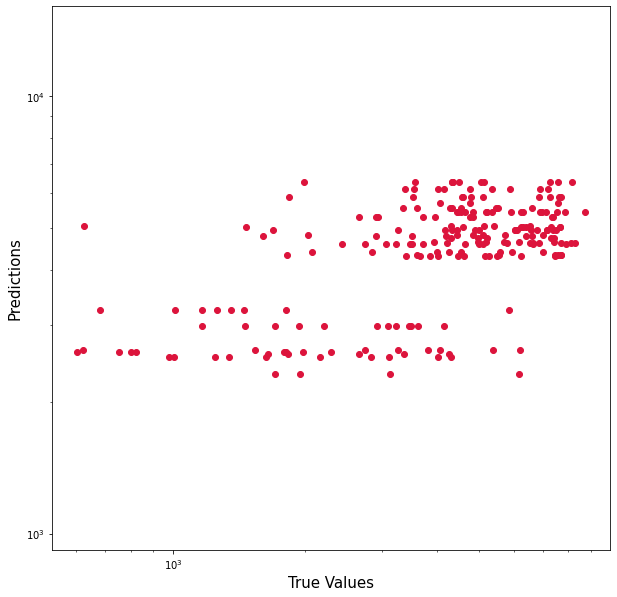

In [39]:
#Analisis visual
plt.figure(figsize=(10,10))
plt.scatter(y_day_test, model_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [42]:
import pydotplus
import graphviz

In [43]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [47]:
features_column = day_df.columns[:-1]
features_column

Index(['season', 'holiday', 'weekday', 'workingday'], dtype='object')

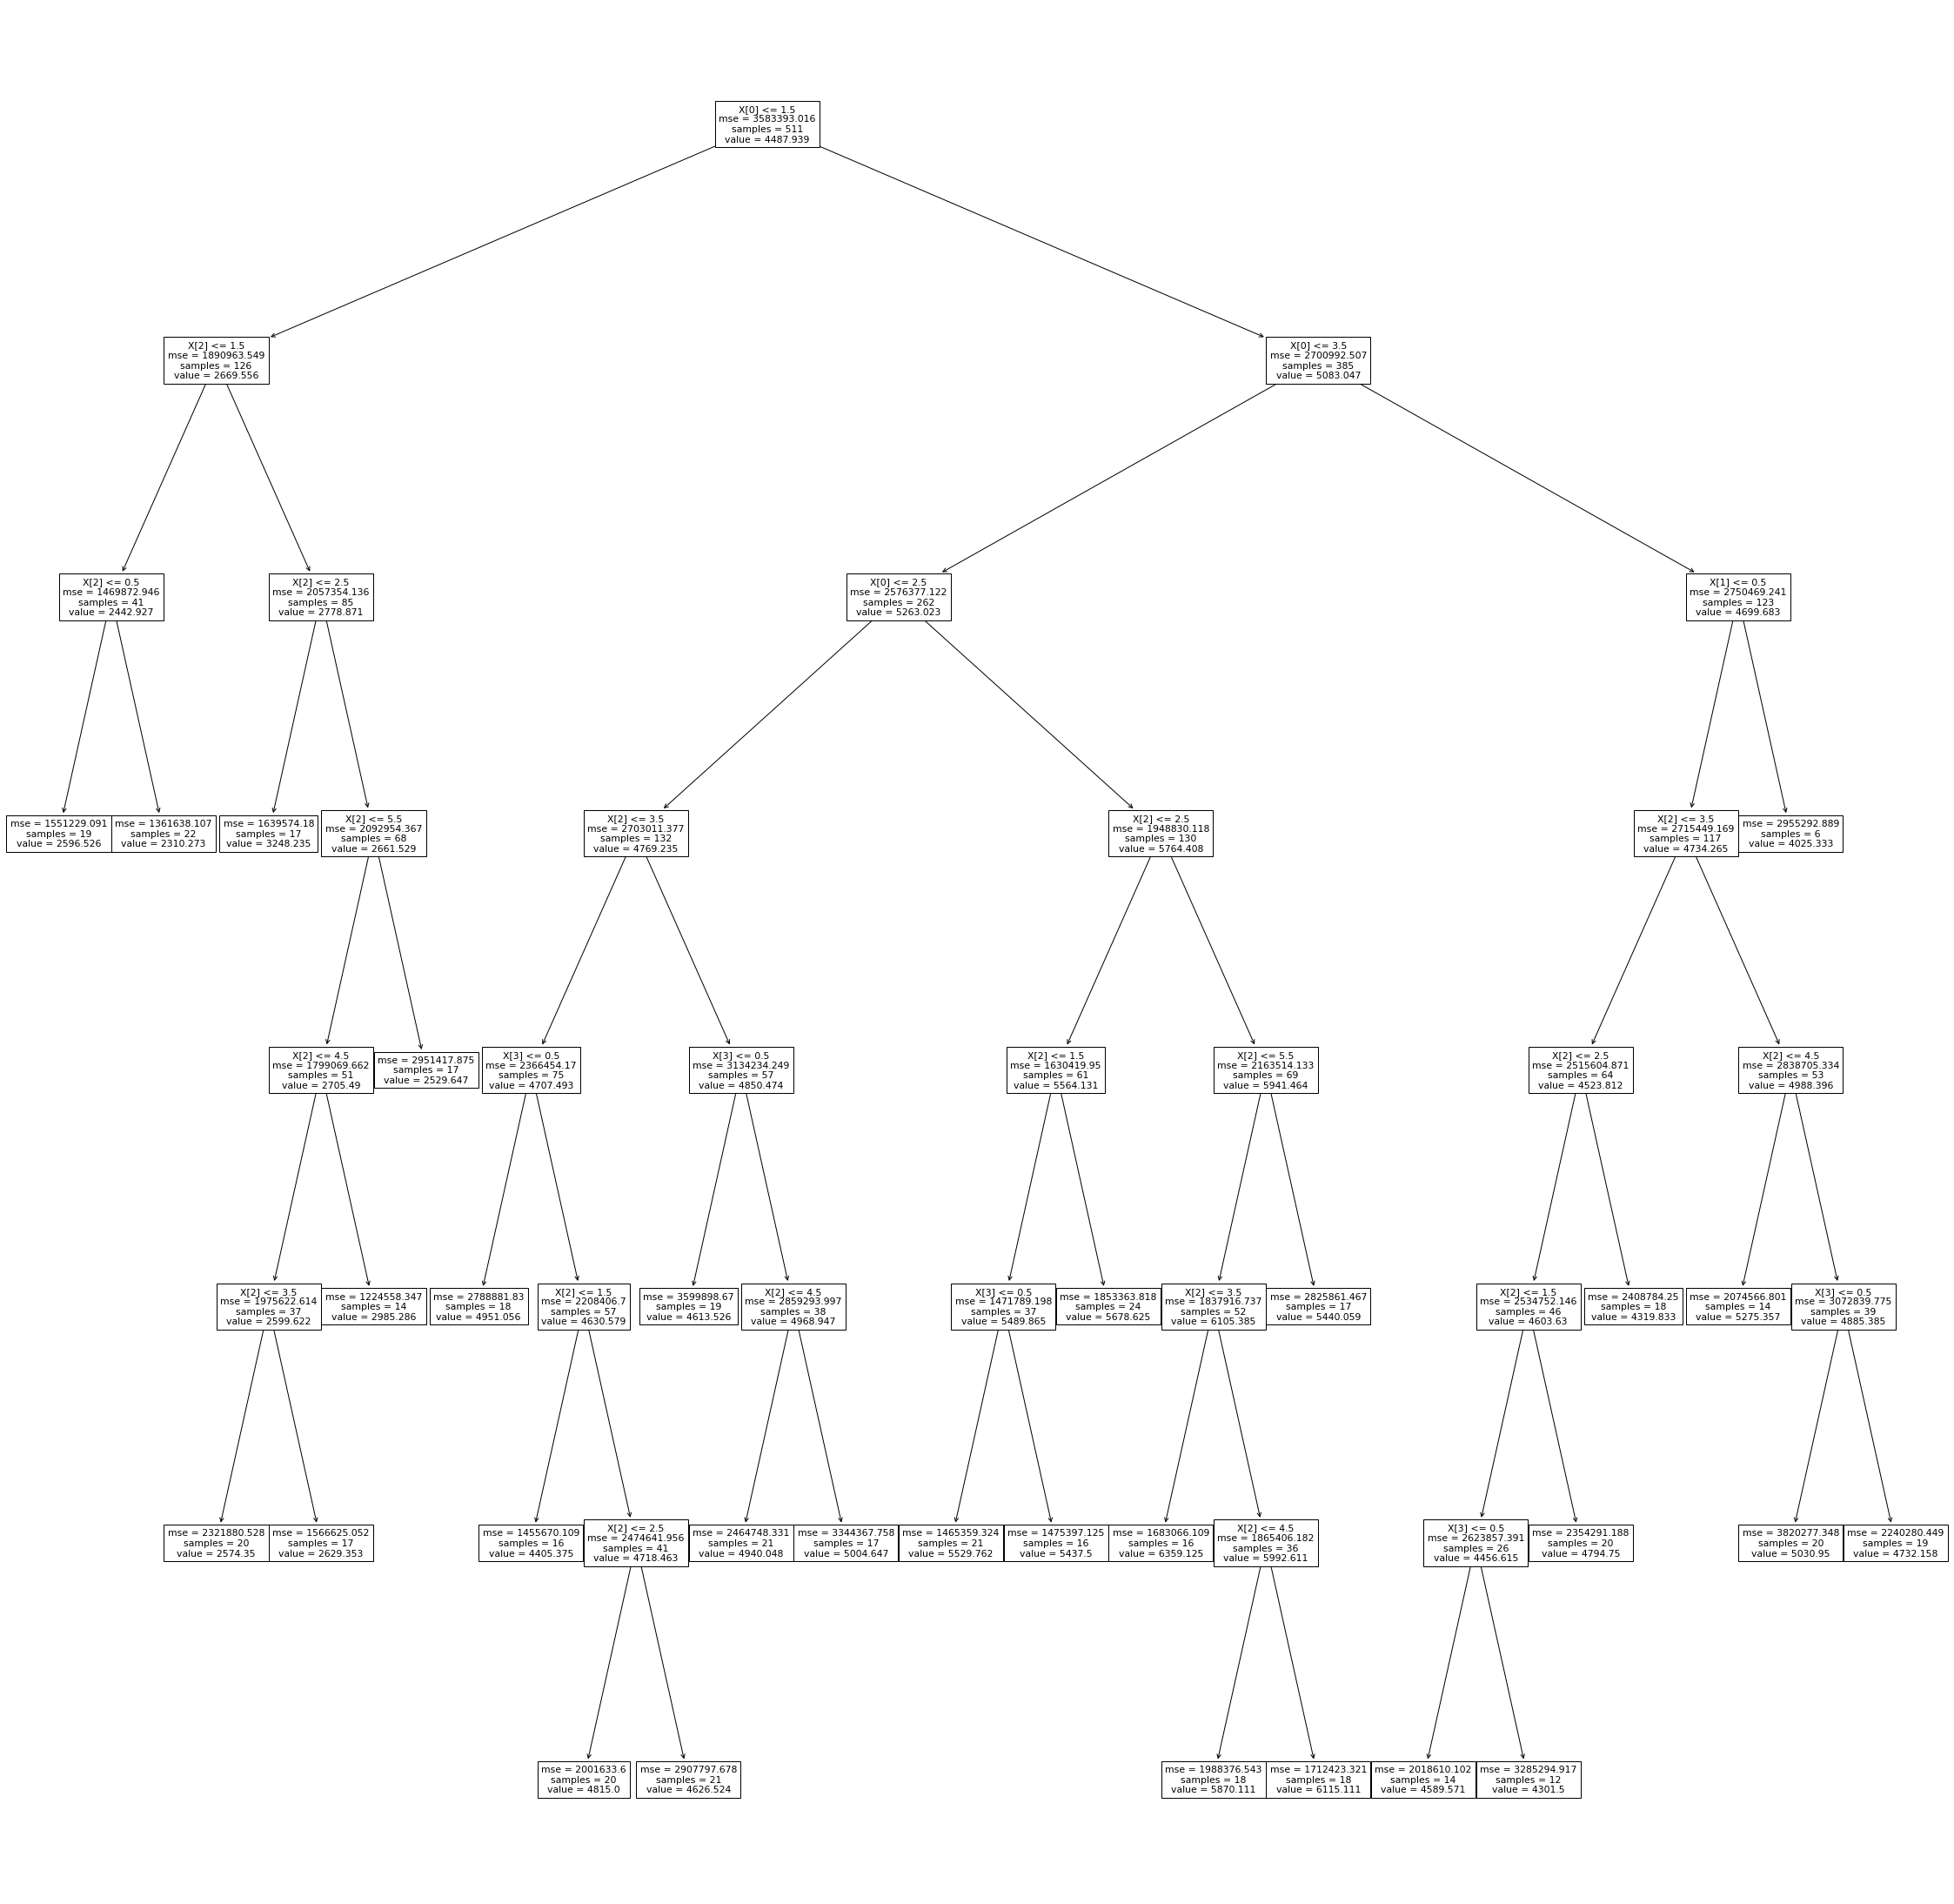

In [48]:
#Diagrama del arbol de decision
fig = plt.figure(figsize=(40,40))
tree.plot_tree(dtr)
fig.savefig("regression_decistion_tree_using_matplotlib.png")

# Random Forest regressor

In [7]:
# Importing the dataset
dataset = pd.read_csv('../datos/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [14]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
regressor.predict([[6.5]])

array([167000.])

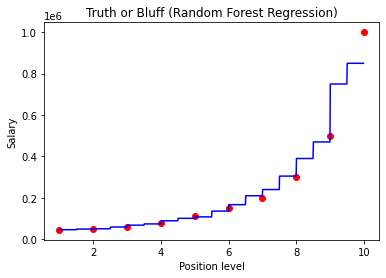

In [15]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Support Vector Regression

In [6]:
# Importing the dataset
dataset = pd.read_csv('../datos/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [19]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

# Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6]])))


c:\Users\jmald\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.01150915])

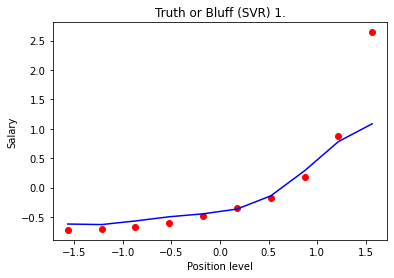

In [20]:
# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR) 1.')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


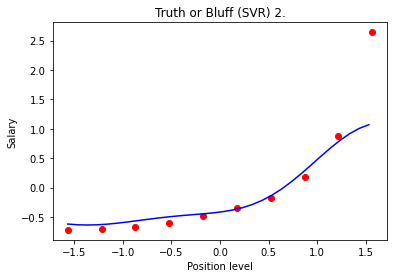

In [21]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR) 2.')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()